In [1]:
# Install necessary libraries
!pip install us

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import the required libraries
import us
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
#from sklearn import datasets


In [3]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
states = us.states.STATES
state_abbr = []
fips = []

for state in states:
    state_abbr.append(state.abbr)
    fips.append(state.fips)

state_abbr = [name.lower() for name in state_abbr]

states.append("District of Columbia")
state_abbr.append("dc")
fips.append("11")

covid_deaths_2020_df = pd.DataFrame({'State': states, 'State Abbreviation':state_abbr, 'FIPS':fips})
covid_deaths_2020_df ["Total Population 2021"] = ""
covid_deaths_2020_df ["Total Cases 2020"] = ""
covid_deaths_2020_df ["Total Hospitalized 2020"] = ""
covid_deaths_2020_df ["Total Deaths 2020"] = ""

# Display sample data
covid_deaths_2020_df

,State,State Abbreviation,FIPS,Total Population 2021,Total Cases 2020,Total Hospitalized 2020,Total Deaths 2020
0,Alabama,al,01,,,,
1,Alaska,ak,02,,,,
2,Arizona,az,04,,,,
3,Arkansas,ar,05,,,,
4,California,ca,06,,,,
5,Colorado,co,08,,,,
6,Connecticut,ct,09,,,,
7,Delaware,de,10,,,,
8,Florida,fl,12,,,,
9,Georgia,ga,13,,,,


In [4]:
covid_deaths_2020_df['State'] = covid_deaths_2020_df['State'] .astype(str)
covid_deaths_2020_df.sort_values('State').reset_index(drop=True)

,State,State Abbreviation,FIPS,Total Population 2021,Total Cases 2020,Total Hospitalized 2020,Total Deaths 2020
0,Alabama,al,01,,,,
1,Alaska,ak,02,,,,
2,Arizona,az,04,,,,
3,Arkansas,ar,05,,,,
4,California,ca,06,,,,
5,Colorado,co,08,,,,
6,Connecticut,ct,09,,,,
7,Delaware,de,10,,,,
8,District of Columbia,dc,11,,,,
9,Florida,fl,12,,,,


In [7]:
# Summary DataFrame
census_url = "https://api.census.gov/data/2021/acs/acs1?get=NAME,B01001_001E&for=state:"
covid_url = "https://api.covidtracking.com/v2/states/"

for index, row in covid_deaths_2020_df.iterrows():
    query_url = f"{census_url}{row['FIPS']}"
    response = requests.get(query_url).json()
    covid_deaths_2020_df.loc[index, "Total Population 2021"] = response[1][1]

for index, row in covid_deaths_2020_df.iterrows():
    query_url = f"{covid_url}{row['State Abbreviation']}/2020-12-31.json"
    response = requests.get(query_url).json()
    covid_deaths_2020_df.loc[index, "Total Cases 2020"] = response["data"]["cases"]["total"]["value"]

for index, row in covid_deaths_2020_df.iterrows():
    query_url = f"{covid_url}{row['State Abbreviation']}/2020-12-31.json"
    response = requests.get(query_url).json()
    covid_deaths_2020_df.loc[index, "Total Hospitalized 2020"] = response["data"]["outcomes"]["hospitalized"]["total"]["value"]
    
for index, row in covid_deaths_2020_df.iterrows():
    query_url = f"{covid_url}{row['State Abbreviation']}/2020-12-31.json"
    response = requests.get(query_url).json()
    covid_deaths_2020_df.loc[index, "Total Deaths 2020"] = response["data"]["outcomes"]["death"]["total"]["value"]
    
covid_deaths_2020_df


,State,State Abbreviation,FIPS,Total Population 2021,Total Cases 2020,Total Hospitalized 2020,Total Deaths 2020
0,Alabama,al,01,5039877,361226,34184,4827
1,Alaska,ak,02,732673,45461,1023,206
2,Arizona,az,04,7276316,520207,37257,8864
3,Arkansas,ar,05,3025891,225138,11358,3676
4,California,ca,06,39237836,2245379,None,25386
5,Colorado,co,08,5812069,334097,18598,4814
6,Connecticut,ct,09,3605597,185708,None,5995
7,Delaware,de,10,1003384,57456,None,926
8,Florida,fl,12,21781128,1300528,63741,21990
9,Georgia,ga,13,10799566,666452,42084,10934


In [8]:
covid_deaths_2020_df.sort_values('State').reset_index(drop=True)

,State,State Abbreviation,FIPS,Total Population 2021,Total Cases 2020,Total Hospitalized 2020,Total Deaths 2020
0,Alabama,al,01,5039877,361226,34184,4827
1,Alaska,ak,02,732673,45461,1023,206
2,Arizona,az,04,7276316,520207,37257,8864
3,Arkansas,ar,05,3025891,225138,11358,3676
4,California,ca,06,39237836,2245379,None,25386
5,Colorado,co,08,5812069,334097,18598,4814
6,Connecticut,ct,09,3605597,185708,None,5995
7,Delaware,de,10,1003384,57456,None,926
8,District of Columbia,dc,11,670050,28983,None,786
9,Florida,fl,12,21781128,1300528,63741,21990


In [9]:
hospital_bed_df = pd.read_csv('2020 Hospital Beds By State Edited.csv')
covid_deaths_2020_df = covid_deaths_2020_df.merge(hospital_bed_df,how='left',on='State')
covid_deaths_2020_df['Death Rate 2020 (%)']=covid_deaths_2020_df['Total Deaths 2020']/covid_deaths_2020_df['Total Cases 2020'] * 100
covid_deaths_2020_df

,State,State Abbreviation,FIPS,Total Population 2021,Total Cases 2020,Total Hospitalized 2020,Total Deaths 2020,State/Local Government,Non-Profit,For-Profit,Total Beds Per 1000 Capita,Death Rate 2020 (%)
0,Alabama,al,01,5039877,361226,34184,4827,1.40,0.84,0.82,3.06,1.336283
1,Alaska,ak,02,732673,45461,1023,206,0.23,1.58,0.36,2.17,0.453136
2,Arizona,az,04,7276316,520207,37257,8864,0.11,1.49,0.39,1.99,1.703937
3,Arkansas,ar,05,3025891,225138,11358,3676,0.36,2.16,0.63,3.16,1.632776
4,California,ca,06,39237836,2245379,None,25386,0.33,1.22,0.30,1.84,1.130589
5,Colorado,co,08,5812069,334097,18598,4814,0.38,1.12,0.41,1.91,1.440899
6,Connecticut,ct,09,3605597,185708,None,5995,0.05,1.99,0.05,2.09,3.228186
7,Delaware,de,10,1003384,57456,None,926,NaN,2.16,0.04,2.20,1.611668
8,Florida,fl,12,21781128,1300528,63741,21990,0.40,1.32,0.82,2.55,1.690852
9,Georgia,ga,13,10799566,666452,42084,10934,0.27,1.78,0.29,2.34,1.640628


In [10]:
hospital_bed_df

,State,State/Local Government,Non-Profit,For-Profit,Total Beds Per 1000 Capita
0,United States,0.34,1.65,0.39,2.38
1,Alabama,1.40,0.84,0.82,3.06
2,Alaska,0.23,1.58,0.36,2.17
3,Arizona,0.11,1.49,0.39,1.99
4,Arkansas,0.36,2.16,0.63,3.16
5,California,0.33,1.22,0.30,1.84
6,Colorado,0.38,1.12,0.41,1.91
7,Connecticut,0.05,1.99,0.05,2.09
8,Delaware,NaN,2.16,0.04,2.20
9,District of Columbia,NaN,3.70,1.01,4.70


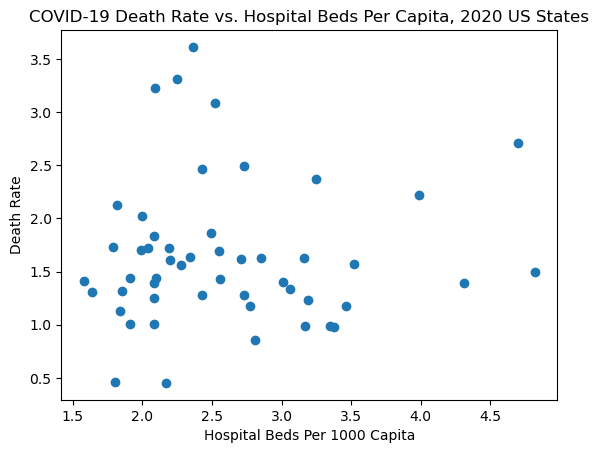

In [11]:
x_values = covid_deaths_2020_df["Total Beds Per 1000 Capita"]
y_values = covid_deaths_2020_df["Death Rate 2020 (%)"]

plt.scatter(x_values, y_values)
plt.xlabel('Hospital Beds Per 1000 Capita')
plt.ylabel('Death Rate')
plt.title('COVID-19 Death Rate vs. Hospital Beds Per Capita, 2020 US States')
plt.show()

In [12]:
covid_deaths_2020_df = covid_deaths_2020_df.astype({"Total Beds Per 1000 Capita" : "float64"}, errors = 'raise')
covid_deaths_2020_df = covid_deaths_2020_df.astype({"Death Rate 2020 (%)" : "float64"}, errors = 'raise')

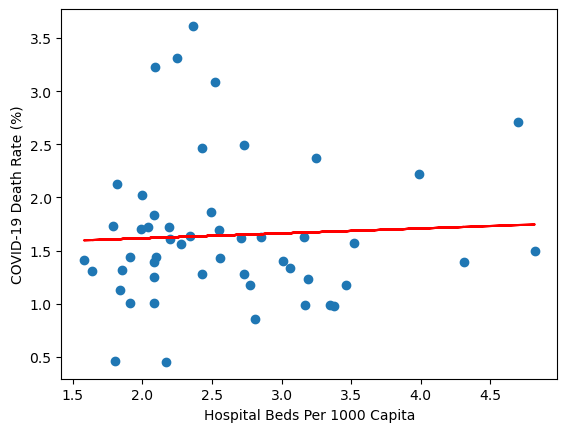

The correlation coefficient between COVID-19 death rate and hospital beds per capita is: 0.05


In [13]:
x_values = covid_deaths_2020_df["Total Beds Per 1000 Capita"]
y_values = covid_deaths_2020_df["Death Rate 2020 (%)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

correlation = st.pearsonr(x_values, y_values)

plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5,1), fontsize = 15, color = "red")
plt.xlabel('Hospital Beds Per 1000 Capita')
plt.ylabel('COVID-19 Death Rate (%)')
plt.show()
print(f"The correlation coefficient between COVID-19 death rate and hospital beds per capita is: {round(correlation[0],2)}")

In [14]:
!pip install geopandas
!pip install pyproj

In [15]:
# Import the required libraries
import pandas as pd
import hvplot.pandas
import geopandas as gpd
import panel as pn

In [16]:
# Assuming you've already loaded and processed your data

# Example: Plotting Total Deaths vs. Total Cases with a scatter plot
covid_deaths_2020_df['Total Deaths 2020'] = covid_deaths_2020_df['Total Deaths 2020'].astype(float)
covid_deaths_2020_df['Total Cases 2020'] = covid_deaths_2020_df['Total Cases 2020'].astype(float)

plot = covid_deaths_2020_df.hvplot.scatter(
    x='Total Cases 2020',
    y='Total Deaths 2020',
    c='State',  # Use color to distinguish states
    cmap='Category20',
    hover_cols=['State'],  # Show state names on hover
    title='Total Deaths vs. Total Cases by State in 2020',
    xlabel='Total Cases 2020',
    ylabel='Total Deaths 2020',
    width=800,
    height=500,
)

plot

C:\Users\mrpea\anaconda3\envs\hvplot-env\lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
C:\Users\mrpea\anaconda3\envs\hvplot-env\lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
C:\Users\mrpea\anaconda3\envs\hvplot-env\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\mrpea\anaconda3\envs\hvplot-env\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: 

:Scatter   [Total Cases 2020]   (Total Deaths 2020,State)

In [17]:
# Load U.S. states boundaries data from geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter U.S. states
us_states = world[world['name'].isin(['United States of America'])]

# Save the U.S. states as a GeoJSON file
us_states.to_file('us_states.geojson', driver='GeoJSON')

C:\Users\mrpea\AppData\Local\Temp\ipykernel_34328\2486050017.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [18]:
# Replace with the actual file path to the .shp file
shapefile_path = "States_shapefile.shp"

# Load the US states shapefile
us_states_gdf = gpd.read_file(shapefile_path)

# Print the column names of the GeoDataFrame
print(us_states_gdf.columns)

Index(['FID', 'Program', 'State_Code', 'State_Name', 'Flowing_St', 'FID_1',
       'geometry'],
      dtype='object')


In [19]:
# Clean state names by stripping leading/trailing spaces and converting to uppercase
us_states_gdf['State_Name'] = us_states_gdf['State_Name'].str.strip().str.upper()
covid_deaths_2020_df['State'] = covid_deaths_2020_df['State'].str.strip().str.upper()

In [20]:
# print the clean dateset
print("Unique state names in shapefile:", us_states_gdf['State_Name'].unique())
print("Unique state names in COVID data:", covid_deaths_2020_df['State'].unique())


Unique state names in shapefile: ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']
Unique state names in COVID data: ['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'FLORIDA' 'GEORGIA' 'HAWAII' 'IDAHO' 'ILLINOIS'
 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY' 'LOUISIANA' 'MAINE' 'MARYLAND'
 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA' 'MISSISSIPPI' 'MISSOURI' 'MONTANA'
 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE' 'NEW JER

In [21]:
# Merge the COVID data with the US states GeoDataFrame based on 'State_Name'
merged_gdf = us_states_gdf.merge(covid_deaths_2020_df, left_on='State_Name', right_on='State', how='left')

# Create a plot of the US states map with COVID data using hvplot
map_plot = merged_gdf.hvplot(
    geo=True,
    line_color='white',
    hover_cols=['State_Name', 'Total Deaths 2020'],  # Include COVID data in hover
    title='US States Map with COVID Data',
    width=1000,
    height=800
)

map_plot

:Polygons   [Longitude,Latitude]   (State_Name,Total Deaths 2020)

In [33]:
import hvplot.pandas

# Convert the columns to numeric data types (in case they are not already)
covid_deaths_2020_df["Total Deaths 2020"] = pd.to_numeric(covid_deaths_2020_df["Death Rate 2020 (%)"], errors="coerce")
covid_deaths_2020_df["Total Population 2021"] = pd.to_numeric(covid_deaths_2020_df["Total Population 2021"], errors="coerce")

# Create a scatter plot
scatter_plot = covid_deaths_2020_df.hvplot.scatter(
    x='Total Population 2021',
    y='Death Rate 2020 (%)',
    c='Death Rate 2020 (%)',  # Color points by Total Deaths 2020
    cmap='viridis',  # Choose a color map
    hover_cols=['State'],  # Show state names on hover
    title='Correlation between Death Rate 2020 (%) and Total Population 2021',
    xlabel='Total Population 2021',
    ylabel='Death Rate 2020 (%)',
    width=800,
    height=500,
)


scatter_plot


C:\Users\mrpea\anaconda3\envs\hvplot-env\lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
C:\Users\mrpea\anaconda3\envs\hvplot-env\lib\site-packages\holoviews\core\util.py:1175: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  return pd.unique(values)
C:\Users\mrpea\anaconda3\envs\hvplot-env\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
C:\Users\mrpea\anaconda3\envs\hvplot-env\lib\site-packages\holoviews\core\data\pandas.py:39: FutureWarning: 

:Scatter   [Total Population 2021]   (Death Rate 2020 (%),State)

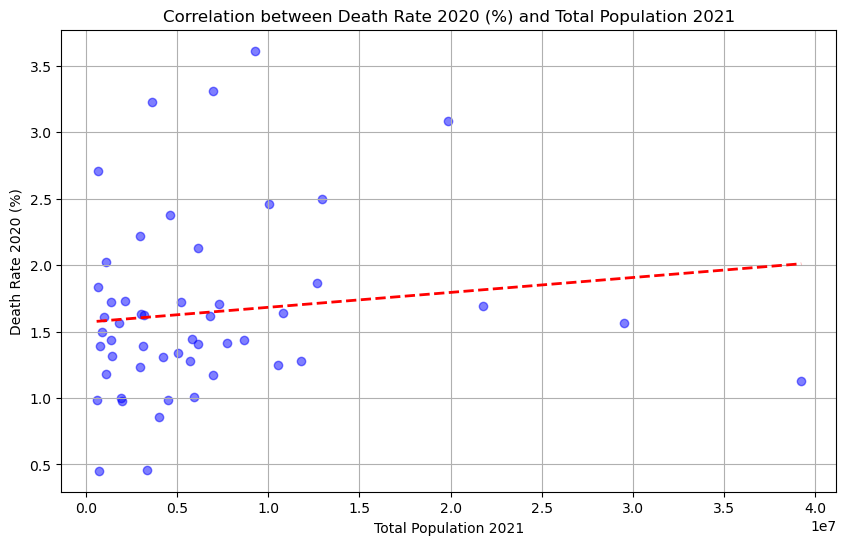

The correlation value = PearsonRResult(statistic=0.12309364320027971, pvalue=0.3894855369166932)


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Convert the columns to numeric data types (in case they are not already)
covid_deaths_2020_df["Total Deaths 2020"] = pd.to_numeric(covid_deaths_2020_df["Death Rate 2020 (%)"], errors="coerce")
covid_deaths_2020_df["Total Population 2021"] = pd.to_numeric(covid_deaths_2020_df["Total Population 2021"], errors="coerce")

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(covid_deaths_2020_df["Total Population 2021"], covid_deaths_2020_df["Death Rate 2020 (%)"], c='blue', alpha=0.5)
plt.title('Correlation between Death Rate 2020 (%) and Total Population 2021')

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = linregress(covid_deaths_2020_df["Total Population 2021"], covid_deaths_2020_df["Death Rate 2020 (%)"])
x_range = np.linspace(covid_deaths_2020_df["Total Population 2021"].min(), covid_deaths_2020_df["Total Population 2021"].max(), 100)
y_range = slope * x_range + intercept

# correlation calculation
x_values = covid_deaths_2020_df["Total Population 2021"]
y_values = covid_deaths_2020_df["Death Rate 2020 (%)"]
correlation = st.pearsonr(x_values, y_values)

# Plot the regression line
plt.plot(x_range, y_range, color='red', linestyle='dashed', linewidth=2)

plt.xlabel('Total Population 2021')
plt.ylabel('Death Rate 2020 (%)')
plt.grid(True)

# Show the plot
plt.show()
print (f"The correlation value = {correlation}")

In [30]:
import hvplot.pandas
import holoviews as hv
import geopandas as gpd

# Merge the COVID data with the US states GeoDataFrame based on 'State_Name'
merged_gdf = us_states_gdf.merge(covid_deaths_2020_df, left_on='State_Name', right_on='State', how='left')

# Create a heatmap using hvplot
heatmap = merged_gdf.hvplot(
    geo=True,
    c='Total Deaths 2020',  # Column to use for color-coding
    cmap='viridis',  # Choose a colormap
    hover_cols=['State_Name', 'Total Deaths 2020'],  # Include COVID data in hover
    title='US States Heatmap with COVID Data (Total Deaths 2020)',
    width=1000,
    height=800,
)

heatmap

:Polygons   [Longitude,Latitude]   (Total Deaths 2020,State_Name)

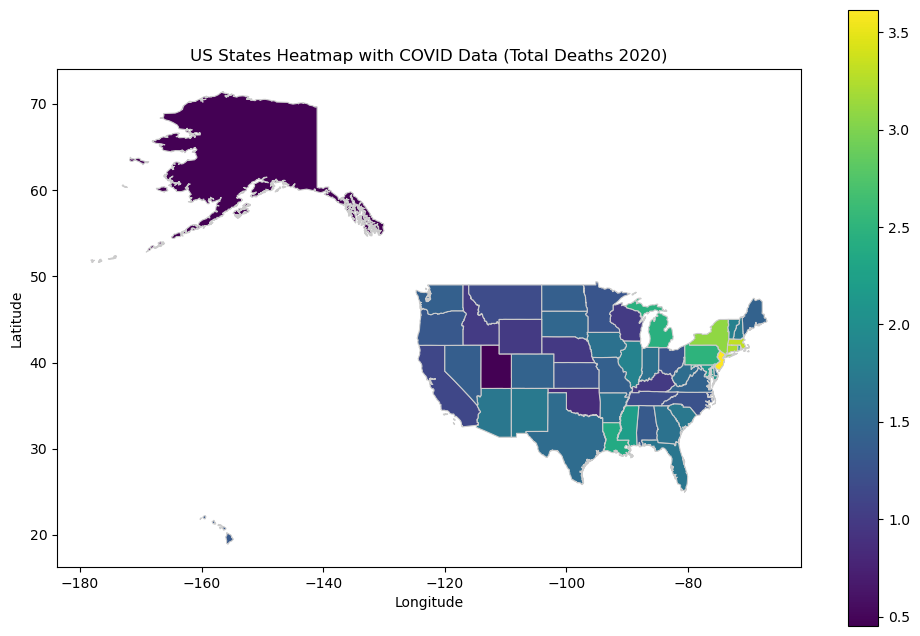

In [31]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Merge the COVID data with the US states GeoDataFrame based on 'State_Name'
merged_gdf = us_states_gdf.merge(covid_deaths_2020_df, left_on='State_Name', right_on='State', how='left')

# Create a figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plot the US states with color-coding based on COVID data (e.g., Total Deaths 2020)
merged_gdf.plot(column='Total Deaths 2020', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set plot title and labels
ax.set_title('US States Heatmap with COVID Data (Total Deaths 2020)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()